#### 연령별 인구 현황 분석
- https://jumin.mois.go.kr/ageStatMonth.do#none
- 2025년 1월 기준

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글설정
plt.rcParams["font.family"] = "Malgun Gothic"
# - 설정
plt.rcParams["axes.unicode_minus"] = False

import warnings
warnings.simplefilter(action="ignore")

#### 데이터 로드

In [46]:
# 엑셀 데이터 로드

df = pd.read_excel("./resources/연령별인구현황.xlsx", skiprows=3,engine="openpyxl")
df

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세.2,60~64세.2,65~69세.2,70~74세.2,75~79세.2,80~84세.2,85~89세.2,90~94세.2,95~99세.2,100세 이상.2
0,0,전국,"51,207,874","51,207,874","1,266,712","1,853,337","2,323,616","2,297,060","2,627,186","3,303,162",...,"2,133,752","2,098,885","1,869,039","1,281,323","990,687","811,449","516,190","206,306","49,439","7,098"
1,1100000000,서울특별시,"9,330,658","9,330,658","202,430","279,014","351,994","368,206","526,274","776,540",...,"363,193","358,833","338,782","238,580","188,642","135,510","76,340","29,023","7,444","1,142"
2,2600000000,부산광역시,"3,263,891","3,263,891","70,696","109,686","135,576","127,469","161,665","194,762",...,"139,082","149,531","147,649","106,324","79,669","59,312","32,903","11,872","2,849",373
3,2700000000,대구광역시,"2,363,281","2,363,281","54,732","86,692","107,245","105,640","124,058","142,608",...,"107,534","104,572","91,564","65,987","49,086","39,977","23,973","8,878","1,896",225
4,2800000000,인천광역시,"3,023,649","3,023,649","81,281","113,059","138,300","134,704","151,985","198,142",...,"129,504","127,755","105,701","65,110","49,649","38,022","24,411","10,217","2,640",420
5,2900000000,광주광역시,"1,407,097","1,407,097","35,896","56,163","72,097","73,174","84,277","96,716",...,"59,151","53,719","45,612","31,546","26,361","19,528","11,517","4,719","1,151",161
6,3000000000,대전광역시,"1,438,974","1,438,974","38,098","52,837","66,775","68,751","87,341","105,553",...,"59,605","56,700","49,679","33,162","24,444","19,241","12,099","4,785","1,167",183
7,3100000000,울산광역시,"1,097,821","1,097,821","27,912","44,600","56,183","53,314","51,063","65,759",...,"51,717","47,525","39,370","24,556","15,668","11,780","6,798","2,651",618,78
8,3600000000,세종특별자치시,"390,910","390,910","16,147","24,921","28,604","24,213","17,547","19,359",...,"11,848","10,572","8,874","5,555","3,819","3,140","2,175","1,052",265,35
9,4100000000,경기도,"13,699,647","13,699,647","386,492","548,097","669,944","649,411","714,227","908,168",...,"567,751","525,335","433,615","276,480","212,186","167,860","106,262","42,523","10,791","1,525"


In [47]:
# 남자 데이터 로드 1)

df_man = pd.read_excel("./resources/연령별인구현황.xlsx", skiprows=3,engine="openpyxl",usecols="B,E:Y")
df_man


,행정기관,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,전국,"1,266,712","1,853,337","2,323,616","2,297,060","2,627,186","3,303,162","3,479,863","3,137,789","3,865,042",...,"4,281,644","4,183,254","3,637,281","2,422,645","1,797,445","1,340,591","768,470","274,046","60,589","8,633"
1,서울특별시,"202,430","279,014","351,994","368,206","526,274","776,540","797,008","645,323","706,510",...,"712,089","690,776","634,124","440,823","338,921","235,864","121,283","40,653","9,639","1,483"
2,부산광역시,"70,696","109,686","135,576","127,469","161,665","194,762","204,157","184,146","236,623",...,"269,015","284,012","275,780","197,077","142,340","99,530","49,644","15,782","3,445",433
3,대구광역시,"54,732","86,692","107,245","105,640","124,058","142,608","148,359","134,116","168,610",...,"209,330","202,162","173,369","120,585","86,359","64,953","35,697","11,912","2,290",262
4,인천광역시,"81,281","113,059","138,300","134,704","151,985","198,142","222,439","199,760","242,186",...,"254,959","253,835","206,774","124,261","90,456","62,763","35,858","13,288","3,205",519
5,광주광역시,"35,896","56,163","72,097","73,174","84,277","96,716","92,683","80,858","107,811",...,"116,763","104,577","86,199","57,557","46,579","32,540","17,374","6,267","1,421",187
6,대전광역시,"38,098","52,837","66,775","68,751","87,341","105,553","103,040","87,860","104,912",...,"118,354","111,191","95,324","62,394","44,447","32,131","18,300","6,500","1,433",218
7,울산광역시,"27,912","44,600","56,183","53,314","51,063","65,759","69,967","66,192","86,702",...,"104,167","97,238","78,207","48,204","29,912","19,612","9,787","3,401",719,88
8,세종특별자치시,"16,147","24,921","28,604","24,213","17,547","19,359","27,532","31,059","40,109",...,"24,303","21,354","17,447","10,821","7,160","5,206","3,178","1,354",326,39
9,경기도,"386,492","548,097","669,944","649,411","714,227","908,168","989,063","916,375","1,119,422",...,"1,136,131","1,058,647","855,686","527,167","386,555","281,080","161,164","57,789","13,389","1,945"


In [48]:
# 남자 데이터 로드 2)

df_man = pd.read_excel("./resources/연령별인구현황.xlsx", skiprows=3,engine="openpyxl",usecols="B,E:Y",index_col="행정기관")
df_man.head(3)

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"1,266,712","1,853,337","2,323,616","2,297,060","2,627,186","3,303,162","3,479,863","3,137,789","3,865,042","3,842,025",...,"4,281,644","4,183,254","3,637,281","2,422,645","1,797,445","1,340,591","768,470","274,046","60,589","8,633"
서울특별시,"202,430","279,014","351,994","368,206","526,274","776,540","797,008","645,323","706,510","676,054",...,"712,089","690,776","634,124","440,823","338,921","235,864","121,283","40,653","9,639","1,483"
부산광역시,"70,696","109,686","135,576","127,469","161,665","194,762","204,157","184,146","236,623","233,235",...,"269,015","284,012","275,780","197,077","142,340","99,530","49,644","15,782","3,445",433


In [49]:
# 여자 데이터 로드

df_woman = pd.read_excel("./resources/연령별인구현황.xlsx", skiprows=3,engine="openpyxl",usecols="B,AB:AV",index_col="행정기관")
df_woman.head(3)

,0~4세.1,5~9세.1,10~14세.1,15~19세.1,20~24세.1,25~29세.1,30~34세.1,35~39세.1,40~44세.1,45~49세.1,...,55~59세.1,60~64세.1,65~69세.1,70~74세.1,75~79세.1,80~84세.1,85~89세.1,90~94세.1,95~99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"648,339","950,546","1,191,717","1,182,489","1,363,617","1,722,639","1,833,053","1,621,988","1,970,544","1,948,862",...,"2,147,892","2,084,369","1,768,242","1,141,322","806,758","529,142","252,280","67,740","11,150","1,535"
서울특별시,"103,671","143,277","180,752","187,565","246,025","366,969","399,672","322,369","350,899","332,453",...,"348,896","331,943","295,342","202,243","150,279","100,354","44,943","11,630","2,195",341
부산광역시,"36,341","56,068","69,500","65,399","82,369","99,722","106,133","94,394","119,822","117,689",...,"129,933","134,481","128,131","90,753","62,671","40,218","16,741","3,910",596,60


#### 데이터 탐색

In [50]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   0~4세     18 non-null     object
 1   5~9세     18 non-null     object
 2   10~14세   18 non-null     object
 3   15~19세   18 non-null     object
 4   20~24세   18 non-null     object
 5   25~29세   18 non-null     object
 6   30~34세   18 non-null     object
 7   35~39세   18 non-null     object
 8   40~44세   18 non-null     object
 9   45~49세   18 non-null     object
 10  50~54세   18 non-null     object
 11  55~59세   18 non-null     object
 12  60~64세   18 non-null     object
 13  65~69세   18 non-null     object
 14  70~74세   18 non-null     object
 15  75~79세   18 non-null     object
 16  80~84세   18 non-null     object
 17  85~89세   18 non-null     object
 18  90~94세   18 non-null     object
 19  95~99세   18 non-null     object
 20  100세 이상  18 non-null     object
dtypes: object(21)
memory usage: 3.1+ KB


In [51]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   0~4세.1     18 non-null     object
 1   5~9세.1     18 non-null     object
 2   10~14세.1   18 non-null     object
 3   15~19세.1   18 non-null     object
 4   20~24세.1   18 non-null     object
 5   25~29세.1   18 non-null     object
 6   30~34세.1   18 non-null     object
 7   35~39세.1   18 non-null     object
 8   40~44세.1   18 non-null     object
 9   45~49세.1   18 non-null     object
 10  50~54세.1   18 non-null     object
 11  55~59세.1   18 non-null     object
 12  60~64세.1   18 non-null     object
 13  65~69세.1   18 non-null     object
 14  70~74세.1   18 non-null     object
 15  75~79세.1   18 non-null     object
 16  80~84세.1   18 non-null     object
 17  85~89세.1   18 non-null     object
 18  90~94세.1   18 non-null     object
 19  95~99세.1   18 non-null     object
 20  100세 이상.1  18 non-null     ob

In [52]:
# , 를 제거

data = {
    "name":["홍길동","김수정","이민정"],
    "age":["25","35","45"]
}
sample_df = pd.DataFrame(data)
sample_df

,name,age
0,홍길동,25
1,김수정,35
2,이민정,45


In [53]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [54]:
# age object => int64 변경
# astype("변경할타입") : NaN 을 가지고 있는 데이터가 있으면 에러 발생
# pd.to_numeric(변경할 컬럼)

sample_df["age_1"] = sample_df["age"].astype("int64")
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      object
 2   age_1   3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [55]:
sample_df.loc[1, 'age'] = np.nan
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     2 non-null      object
 2   age_1   3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [56]:
sample_df

,name,age,age_1
0,홍길동,25,25
1,김수정,NaN,35
2,이민정,45,45


In [57]:
# ValueError: cannot convert float NaN to integer
# sample_df["age_2"] = sample_df["age"].astype("int64")
sample_df["age_2"] = pd.to_numeric(sample_df["age"])
sample_df

,name,age,age_1,age_2
0,홍길동,25,25,25.0
1,김수정,NaN,35,NaN
2,이민정,45,45,45.0


In [58]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   age     2 non-null      object 
 2   age_1   3 non-null      int64  
 3   age_2   2 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 228.0+ bytes


In [59]:
# 컬럼 하나만 변경 시 

df_man["10~14세"].str.replace(",","").astype("int64")

행정기관
전국           2323616
서울특별시         351994
부산광역시         135576
대구광역시         107245
인천광역시         138300
광주광역시          72097
대전광역시          66775
울산광역시          56183
세종특별자치시        28604
경기도           669944
강원특별자치도        62108
충청북도           71684
충청남도          101887
전북특별자치도        79210
전라남도           78172
경상북도          107939
경상남도          159622
제주특별자치도        36276
Name: 10~14세, dtype: int64

In [60]:
df_man = df_man.apply(lambda x:x.str.replace(",","").astype("int64"))
df_man.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0~4세     18 non-null     int64
 1   5~9세     18 non-null     int64
 2   10~14세   18 non-null     int64
 3   15~19세   18 non-null     int64
 4   20~24세   18 non-null     int64
 5   25~29세   18 non-null     int64
 6   30~34세   18 non-null     int64
 7   35~39세   18 non-null     int64
 8   40~44세   18 non-null     int64
 9   45~49세   18 non-null     int64
 10  50~54세   18 non-null     int64
 11  55~59세   18 non-null     int64
 12  60~64세   18 non-null     int64
 13  65~69세   18 non-null     int64
 14  70~74세   18 non-null     int64
 15  75~79세   18 non-null     int64
 16  80~84세   18 non-null     int64
 17  85~89세   18 non-null     int64
 18  90~94세   18 non-null     int64
 19  95~99세   18 non-null     int64
 20  100세 이상  18 non-null     int64
dtypes: int64(21)
memory usage: 3.6+ KB


In [61]:
df_woman = df_woman.apply(lambda x:x.str.replace(",","").astype("int64"))
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국   to 제주특별자치도  
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   0~4세.1     18 non-null     int64
 1   5~9세.1     18 non-null     int64
 2   10~14세.1   18 non-null     int64
 3   15~19세.1   18 non-null     int64
 4   20~24세.1   18 non-null     int64
 5   25~29세.1   18 non-null     int64
 6   30~34세.1   18 non-null     int64
 7   35~39세.1   18 non-null     int64
 8   40~44세.1   18 non-null     int64
 9   45~49세.1   18 non-null     int64
 10  50~54세.1   18 non-null     int64
 11  55~59세.1   18 non-null     int64
 12  60~64세.1   18 non-null     int64
 13  65~69세.1   18 non-null     int64
 14  70~74세.1   18 non-null     int64
 15  75~79세.1   18 non-null     int64
 16  80~84세.1   18 non-null     int64
 17  85~89세.1   18 non-null     int64
 18  90~94세.1   18 non-null     int64
 19  95~99세.1   18 non-null     int64
 20  100세 이상.1  18 non-null     int64
dtypes: int64(21)


In [62]:
# 컬럼명 조회

df_man.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object')

In [63]:
df_woman.columns

Index(['0~4세.1', '5~9세.1', '10~14세.1', '15~19세.1', '20~24세.1', '25~29세.1',
       '30~34세.1', '35~39세.1', '40~44세.1', '45~49세.1', '50~54세.1', '55~59세.1',
       '60~64세.1', '65~69세.1', '70~74세.1', '75~79세.1', '80~84세.1', '85~89세.1',
       '90~94세.1', '95~99세.1', '100세 이상.1'],
      dtype='object')

In [64]:
# 남자, 여자 컬럼명 동일하게 변경
# 변경할 컬럼명이 일부인 경우
# rename(columns={"변경전":"변경후"})
# 변경할 컬럼명이 전체인 경우
# df_woman.columns = ["변경할 컬럼명 나열"]

df_woman.columns = df_man.columns

In [65]:
df_woman.columns

Index(['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상'],
      dtype='object')

#### 데이터 시각화

In [66]:
df_man.head()

# df_man.iloc[행, 열] : index 값으로 접근
# df_man.loc[행, 열] : 이름 으로 접근

# 전국 데이터 접근
df_man.iloc[0] // 10000

0~4세       126
5~9세       185
10~14세     232
15~19세     229
20~24세     262
25~29세     330
30~34세     347
35~39세     313
40~44세     386
45~49세     384
50~54세     443
55~59세     428
60~64세     418
65~69세     363
70~74세     242
75~79세     179
80~84세     134
85~89세      76
90~94세      27
95~99세       6
100세 이상      0
Name: 전국  , dtype: int64

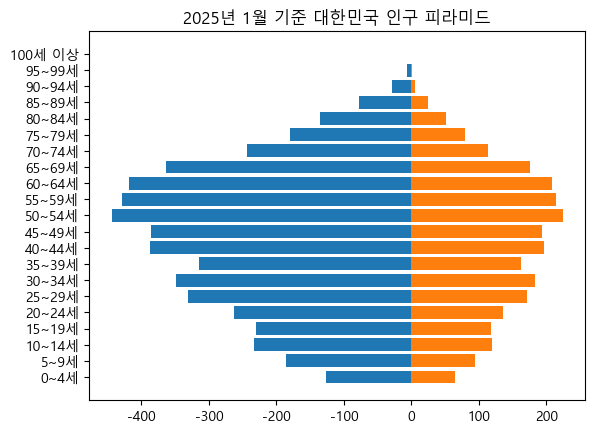

In [67]:
plt.barh(y=df_man.columns,width=-df_man.iloc[0] // 10000) # 단위 : 천명
plt.barh(y=df_woman.columns,width=df_woman.iloc[0] // 10000) # 단위 : 천명
g = plt.title("2025년 1월 기준 대한민국 인구 피라미드")

# 너무 차이가 많이 난다.. 확인해 볼 것!